In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np
import matplotlib  as mpl
import h5py
import matplotlib.colors as colors
from tqdm import tqdm
from scipy import stats
import cmasher as cmr
import seaborn as sns
import warnings
import multiprocessing as mp
from functools import partial
from tqdm import tqdm

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

from matplotlib.colors import Normalize

import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable

from matplotlib.colors import LogNorm

## Load data 

In [2]:
my_data_cube = np.load('/u/flolac/Cube_datas/cube_data.npy')

bin_centers_lambda = np.load('/u/flolac/Cube_datas/bin_centers_lambda.npy')

my_data_cube = np.transpose(my_data_cube, (2, 1, 0))

bin_edges_data = np.load('/u/flolac/Cube_datas/Bin_edges.npz')
x_bins = bin_edges_data['x']
y_bins = bin_edges_data['y']
lambda_bins = bin_edges_data['lambda_']

lambda_alpha_rest = 6564.6
z=2
lambda_alpha = lambda_alpha_rest * (1+z)
print(lambda_bins)
lambda_bins += lambda_alpha
lambda_bins *= (1+z)

Bin_edges = [x_bins, y_bins, lambda_bins]

[-10.48623219  -9.84578323  -9.20533427  -8.56488532  -7.92443636
  -7.28398741  -6.64353845  -6.00308949  -5.36264054  -4.72219158
  -4.08174262  -3.44129367  -2.80084471  -2.16039575  -1.5199468
  -0.87949784  -0.23904889   0.40140007   1.04184903   1.68229798
   2.32274694   2.9631959    3.60364485   4.24409381   4.88454277
   5.52499172   6.16544068   6.80588963   7.44633859   8.08678755
   8.7272365    9.36768546  10.00813442  10.64858337  11.28903233
  11.92948128]


In [3]:
bin_centers_lambda

array([-10.16600771,  -9.52555875,  -8.8851098 ,  -8.24466084,
        -7.60421188,  -6.96376293,  -6.32331397,  -5.68286501,
        -5.04241606,  -4.4019671 ,  -3.76151815,  -3.12106919,
        -2.48062023,  -1.84017128,  -1.19972232,  -0.55927336,
         0.08117559,   0.72162455,   1.36207351,   2.00252246,
         2.64297142,   3.28342037,   3.92386933,   4.56431829,
         5.20476724,   5.8452162 ,   6.48566516,   7.12611411,
         7.76656307,   8.40701203,   9.04746098,   9.68790994,
        10.32835889,  10.96880785,  11.60925681])

In [4]:
bin_centers_lambda+=lambda_alpha

In [5]:
lambda_alpha

19693.800000000003

## Using msafit

In [6]:
from msafit.model.config import get_default_config
params = get_default_config()
params['instrument']['filter'] = "F170LP"
params['instrument']['disperser'] = "G235H"

In [7]:
bin_centers_lambda

array([19683.63399229, 19684.27444125, 19684.9148902 , 19685.55533916,
       19686.19578812, 19686.83623707, 19687.47668603, 19688.11713499,
       19688.75758394, 19689.3980329 , 19690.03848185, 19690.67893081,
       19691.31937977, 19691.95982872, 19692.60027768, 19693.24072664,
       19693.88117559, 19694.52162455, 19695.16207351, 19695.80252246,
       19696.44297142, 19697.08342037, 19697.72386933, 19698.36431829,
       19699.00476724, 19699.6452162 , 19700.28566516, 19700.92611411,
       19701.56656307, 19702.20701203, 19702.84746098, 19703.48790994,
       19704.12835889, 19704.76880785, 19705.40925681])

In [8]:
from msafit.fpa import PSFLib

psfs = PSFLib('1x3_G235H_Q3_PSFLib.fits')

params["grid"]["x_grid"] = psfs.psf_x
params["grid"]["y_grid"] = psfs.psf_y
params["grid"]["wave_grid"] = bin_centers_lambda

In [9]:
bin_centers_lambda

array([19683.63399229, 19684.27444125, 19684.9148902 , 19685.55533916,
       19686.19578812, 19686.83623707, 19687.47668603, 19688.11713499,
       19688.75758394, 19689.3980329 , 19690.03848185, 19690.67893081,
       19691.31937977, 19691.95982872, 19692.60027768, 19693.24072664,
       19693.88117559, 19694.52162455, 19695.16207351, 19695.80252246,
       19696.44297142, 19697.08342037, 19697.72386933, 19698.36431829,
       19699.00476724, 19699.6452162 , 19700.28566516, 19700.92611411,
       19701.56656307, 19702.20701203, 19702.84746098, 19703.48790994,
       19704.12835889, 19704.76880785, 19705.40925681])

In [10]:
np.shape(psfs.psf_cube)

(17, 79, 23, 125, 125)

In [11]:
#psfs.__dict__

In [12]:
np.shape(psfs.psf_cube)

(17, 79, 23, 125, 125)

In [13]:
from msafit.model.cube import Cube

cube = Cube(psfs.psf_x,psfs.psf_y,bin_centers_lambda)

In [14]:
cube.data = my_data_cube

In [15]:
cube.__dict__

{'_x': array([[-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ],
        [-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ],
        [-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ],
        ...,
        [-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ],
        [-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ],
        [-1.        , -0.90909091, -0.81818182, ...,  0.81818182,
          0.90909091,  1.        ]], dtype='>f8'),
 '_y': array([[-1.8       , -1.8       , -1.8       , ..., -1.8       ,
         -1.8       , -1.8       ],
        [-1.75384615, -1.75384615, -1.75384615, ..., -1.75384615,
         -1.75384615, -1.75384615],
        [-1.70769231, -1.70769231, -1.70769231, ..., -1.70769231,
         -1.70769231, -1.70769231],
        ...,
        [ 1.70769231,  1.7076

In [16]:
my_data_cube

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
#cube.__dict__

In [18]:
l0 = lambda_alpha

psf_lib = PSFLib('1x3_G235H_Q3_PSFLib.fits')
psf_lib.interp_new_wave(l0)

wsel = np.argmin(np.abs(psf_lib.psf_wave - l0))
psf_lib.slice_cube(wsel=(wsel,wsel+1))

check sum: 382.73813823853186 380.2335276650687 381.9712264809363


In [19]:
np.shape(cube.data)

(35, 79, 23)

In [20]:
np.shape(psf_lib.psf_cube)

(1, 79, 23, 125, 125)

In [21]:
from msafit.fpa import Spec2D

spec = Spec2D(params)
throughput = spec.make_spec2d(cube,psf_lib,return_fluxes=True)

print("\ntotal flux on detector:",throughput)


total flux on detector: [1.47447422e-20 5.05016754e-20 7.53666808e-20 9.95896114e-20
 1.21670825e-19 1.69496267e-19 2.33089575e-19 3.08492282e-19
 3.70143693e-19 4.02086182e-19 4.56357695e-19 4.72669589e-19
 4.50982393e-19 4.58037129e-19 4.22876793e-19 2.96771786e-19
 2.29734988e-19 1.91559636e-19 1.90085275e-19 1.75305566e-19
 1.75675802e-19 2.30809772e-19 2.34307222e-19 2.34285891e-19
 2.39475892e-19 2.22491569e-19 2.68481291e-19 2.96357472e-19
 2.71072721e-19 1.50687766e-19 8.68908934e-20 2.94956369e-20
 9.66912187e-21 9.55375040e-22 7.49095486e-23]


In [22]:
spec.__dict__

{'pix_size': 1.8e-05,
 'pix_per_shutter': 5,
 'sca491': array([[[-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502],
         [-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502],
         [-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502],
         ...,
         [-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502],
         [-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502],
         [-0.03817102, -0.03815302, -0.03813502, ..., -0.00136102,
          -0.00134302, -0.00132502]],
 
        [[-0.018423  , -0.018423  , -0.018423  , ..., -0.018423  ,
          -0.018423  , -0.018423  ],
         [-0.018405  , -0.018405  , -0.018405  , ..., -0.018405  ,
          -0.018405  , -0.018405  ],
         [-0.018387  , -0.018387  , -0.018387  , ..., -0.018387  ,
          -0.018387  , -0.018

In [23]:
spec.spec_492

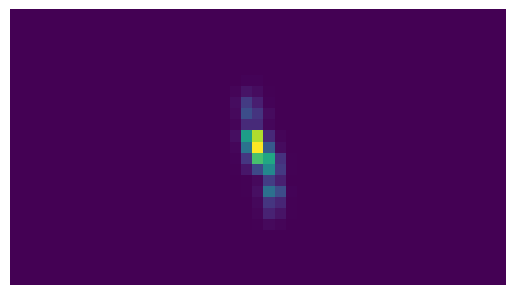

In [24]:
# let's plot some of detector SCA-491 

plt.imshow(spec.spec_491,origin='lower')
plt.axis('off')
plt.show()

## Adding noise

In [25]:
flattened_array = spec.spec_491.flatten()
sorted_array = np.sort(flattened_array)[::-1]
top_12_values = sorted_array[:12]

In [26]:
Flux = np.sum(top_12_values)
SNR = 50
N = 12
Sqrt_N = np.sqrt(N)

In [27]:
Sigma = Flux / (SNR * Sqrt_N)

In [28]:
gaussian_noise = np.random.normal(0, Sigma, spec.spec_491.shape)

# Add the Gaussian noise to the original RPM data
Noisy_spec_491 = spec.spec_491 + gaussian_noise

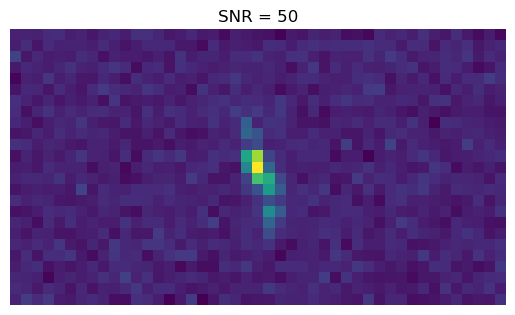

In [29]:
plt.imshow(Noisy_spec_491,origin='lower')
plt.title("SNR = 50")
plt.axis('off')
plt.show()

In [30]:
np.save('/u/flolac/Mocks/mock_1.npy', Noisy_spec_491)
np.save('/u/flolac/Mocks/error_array_1.npy', gaussian_noise)

In [31]:
print("\nparams['instrument']",params["instrument"])
print("\nparams['geometry']=", params["geometry"])
print("\nparams['morph']=", params["morph"])


params['instrument'] {'filter': 'F170LP', 'disperser': 'G235H', 'psf_oversampling': 5}

params['geometry']= {'quadrant': 3, 'shutter_i': 183, 'shutter_j': 85, 'shutter_array': '1x3', 'source_shutter': 0, 'psky_x': 0.268, 'psky_y': 0.53}

params['morph']= [{'profile': 'sersic', 'flux': 1.0, 'x0': 0.0, 'y0': 0.0, 'x0_sky': None, 'y0_sky': None, 'r_e': 0.3, 'n': 1.0, 'q': 0.6, 'PA': 90.0}]
